<a href="https://colab.research.google.com/github/Ads369/Ads_2s/blob/main/18_1_%D0%92%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B2_%D1%81%D0%B2%D0%B5%D1%80%D1%82%D0%BE%D1%87%D0%BD%D1%8B%D0%B5_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D0%B5_%D1%81%D0%B5%D1%82%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Навигация по уроку**

1. Введение в сверточные нейронные сети
2. [Обучение сверточной нейронной сети на ограниченном наборе данных](https://colab.research.google.com/drive/1e1aZ9K1vQIujPf1mzmta5xtbfNqJ_ai-)
3. [Предобученные сверточные НС](https://colab.research.google.com/drive/12VehrJe062P9QImtvjILQG0DOLooiyk0)
4. [Домашняя работа](https://colab.research.google.com/drive/18saeNkboTBS_5E9lxJ6xB4R0pawgxruY)

В данном уроке мы познакомимся с новым типом нейронных сетей (Convolutional Neural Network, CNN - сверточные НС), которые активно используются в приложениях компьютерного зрения и распознавания образов. Мы научимся применять сверточные нейронные сети для решения задач классификации изображений, в частности задач с небольшими наборами обучающих данных, которые являются наиболее распространенными. Сбор датасета с однообразными изображениями и их обработка - это очень трудозатратный процесс, а потому приходиться работать со скудными датасетами и довольствоваться малым. Но и в такой, казалось бы тупиковой, ситуации есть технологичный выход - аугментация данных. Но об этом немного позже.





## Создание простой сверточной НС

Но сначала рассмотрим практический пример простой сверточной нейронной сети, в котором сеть используется для классификации изображений цифр из набора MNIST. Эту задачу мы уже решали ранее, использовав полносвязную сеть (ее точность на контрольных данных составляет около 97%). Несмотря на простоту сверточной нейронной сети, ее точность будет значительно выше полносвязной модели.



### Практический пример

Рассмотрим простую сверточная нейронную сеть. Это "слоенный пирог" из слоев Conv2D и MaxPooling2D. Важно отметить, что данная сеть принимает на входе тензоры с формой `(высота изображения, ширина изображения, каналы)`. В полносвязной сети форма входных данных включала измерение, определяющее
пакеты. Для задачи MNIIST для сверточной сети мы настраиваем сеть на обработку входов с размерами (28, 28, 1), соответствующими формату изображений в наборе MNIST, передав аргумент `input_shape=(28, 28, 1)` в первый слой.

Рассмотрим поближе текущую архитектуру сети:

In [ ]:
from keras import layers
from keras import models
model = models.Sequential()

# Создаем слой свертки с 32 фильтрами (каналами) с размером ядра (3, 3) и функцией активации ReLU
model.add(layers.Conv2D(32, (3, 3), activation='relu',
 input_shape=(28, 28, 1)))

# Создаем слой объединения с ядром (2, 2)
model.add(layers.MaxPooling2D((2, 2)))

# Создаем слой свертки с 64 фильтрами (каналами) с размером ядра (3, 3) и функцией активации ReLU
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Создаем слой объединения с ядром (2, 2)
model.add(layers.MaxPooling2D((2, 2)))

# Создаем слой свертки с 64 фильтрами (каналами) с размером ядра (3, 3) и функцией активации ReLU
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 55744 (217.75 KB)
Trainable params: 55744 

Как видите, все слои, Conv2D и MaxPooling2D, выводят трехмерный тензор с формой
`(высота, ширина, каналы)`. Измерения ширины и высоты сжимаются с ростом глубины сети. Количество каналов управляется первым аргументом, передаваемым
в слои Conv2D (32 или 64).


Следующий шаг — передача последнего выходного тензора (с формой `(3, 3, 64)`)
на вход полносвязной классифицирующей сети, подобной той, с которой мы уже
знакомы: стека слоев Dense. Эти классификаторы обрабатывают векторы — одномерные массивы, тогда как текущий выход является трехмерным тензором. Поэтому мы должны прежде преобразовать трехмерный вывод в одномерный и затем
добавить сверху несколько слоев Dense.

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

Мы реализуем 10-видовую классификацию, используя конечный слой с 10 выходами и функцией активации softmax. Вот как выглядит сеть теперь:

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

Как видите, выходы `(3, 3, 64)` преобразуются в векторы с формой `(576,)` перед
передачей двум слоям Dense. Теперь давайте обучим сеть, передав ей цифры из набора MNIST:

In [ ]:
from keras.datasets import mnist
from keras.utils import to_categorical

# Загружаем тренировочные и контрольные образцы базы MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Меняем форму данных на (образцы, высота, ширина, каналы)
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# Нормализуем данные
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Прямое кодирование категорий в формат onehot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Компилируем модель
model.compile(optimizer='rmsprop',
 loss='categorical_crossentropy',
 metrics=['accuracy'])

# Обучаем модель на 5 эпохах, размер пакета 64
model.fit(train_images, train_labels, epochs=5, batch_size=64)

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
938/938 [==============================] - 68s 72ms/step - loss: 0.1700 - accuracy: 0.9469
Epoch 2/5
938/938 [==============================] - 57s 61ms/step - loss: 0.0474 - accuracy: 0.9847
Epoch 3/5
938/938 [==============================] - 61s 65ms/step - loss: 0.0335 - accuracy: 0.9895
Epoch 4/5
938/938 [==============================] - 61s 65ms/step - loss: 0.0239 - accuracy: 0.9926
Epoch 5/5
938/938 [==============================] - 53s 57ms/step - loss: 0.0188 - accuracy: 0.9943


Оценим модель на контрольных данных:

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

313/313 [==============================] - 3s 10ms/step - loss: 0.0241 - accuracy: 0.9927


0.9926999807357788

ВАУ! Точность предсказания выросла более чем 99% на контрольной выборке. Это прекрасный результат!

Так почему же такая простая сверточная нейронная сеть работает настолько хорошо
в сравнении с полносвязной моделью?

Чтобы ответить на этот вопрос, мы погрузимся в особенности работы слоев Conv2D и MaxPooling2D.

### Свертка

Основное отличие полносвязного слоя от сверточного заключается в следующем:


**слои Dense изучают глобальные шаблоны в пространстве входных признаков**
(например, в случае с цифрами из набора MNIST это шаблоны, вовлекающие все пиксели), тогда как **сверточные слои изучают локальные шаблоны**.

Сверточные слои состоят из наборов **ядер**, которые также называются **фильтрами**. Каждое из ядер представляет небольшое окно, сканирующее изображение (сворачивает), из верхнего левого угла в правый нижний.



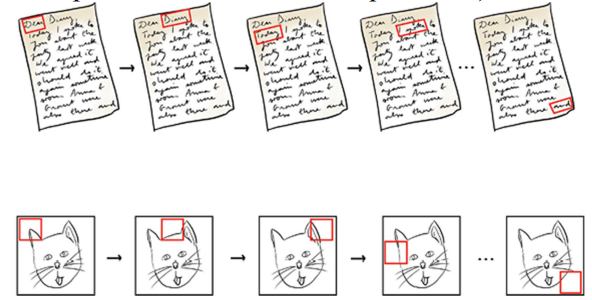

Рис. 1. Сравнение свертки и чтение книги

Обратите внимание на рис. 1. Как мы читаем книгу?

Чтение страниц книги мы начинаем с левого верхнего угла и заканчиваем в правом нижнем. Каждый раз, достигая конца строки, мы переходим к началу следующей. Так мы рано или поздно достигаем правого нижнего угла, прочитав все слова на странице. Ядро в сверточном слое тоже начинает сканирование в левом верхнем углу изображения, перемещаясь слева направо, ряд за рядом, пока наконец не
достигнет правого нижнего угла, просканировав все пиксели изображения.

Ядра состоят из весов, которые, как в полносвязанных слоях, корректируются в ходе обратного распространения. Они могут иметь разный размер, но чаще используются ядра 3 × 3. В предыдущем примере  и мы также используем этот размер в примерах в этой главе. Для одноцветных цифр MNIST такое окно размером 3 × 3 пиксела будет состоять из 3 × 3 × 1 весов — девяти весов и в целом 10 параметров (подобно искусственным нейронам в полносвязанном слое, каждый
сверточный фильтр имеет член смещения b). Для сравнения, если бы мы работали с полноцветными RGB-изображениями, ядро, охватывающее такое же число пикселей, имело бы в три раза больше весов — 3 × 3 × 3, всего 27 весов и 28 параметров.

Свертка применяется к трехмерным тензорам, называемым картами признаков,
с двумя пространственными осями (высота и ширина), а также с осью глубины (или
осью каналов). Т.е. для изображений в формате RGB размерность оси глубины равна 3, а для черно-белых изображений, как в наборе MNIST, ось глубины имеет размерность 1.

Операция свертывания извлекает шаблоны из своей входной карты признаков и применяет одинаковые преобразования ко всем шаблонам, производя выходную карту признаков. Эта выходная карта признаков также является трехмерным тензором: она имеет ширину и высоту. Ее глубина может иметь любую размерность, потому что выходная глубина является параметром слоя, и разные каналы на этой оси глубины больше не соответствуют конкретным цветам, как во входных данных в формате RGB, скорее они теперь соответствуют фильтрам. Фильтры представляют собой конкретные аспекты входных данных: на верхнем уровне, например, фильтр может соответствовать понятию «присутствие лица на входе».

В примере MNIST первый сверточный слой принимает карту признаков с размером (28, 28, 1) и выводит карту признаков с размером (26, 26, 32): он вычисляет 32 фильтра по входным данным. Каждый из этих 32 выходных каналов содержит сетку 26 × 26 значений — карту ответов фильтра на входных данных, определяющую ответ этого шаблона фильтра для разных участков входных данных (рис. 2).

Таким образом термин **карта признаков** означает, что каждое измерение на оси
глубины — это признак (или фильтр), а двумерный тензор `output[:, :, n]` — это
двумерная пространственная карта ответов этого фильтра на входных данных.

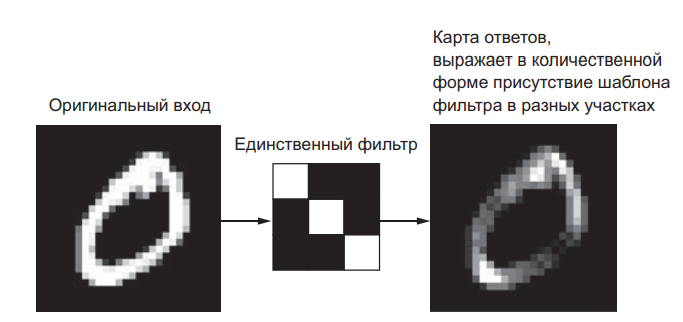

Рис. 2. Двумерная карта ответов, определяющая присутствие шаблона в разных участках входных данных


Как показано на рис. 1 (на примере изображения кошки), ядро последовательно занимает дискретные позиции на изображении по мере его свертывания.

Исходя из размера ядра 3 × 3, в ходе прямого распространения для каждой позиции, в которой оказывается ядро, вычисляется многомерный вариант "самого главного уравнения в ИИ":

$w⋅x + b$

В соответствии с размером ядра 3 × 3, как показано на рис. 3, на основе входных данных $x$ (исходный образ) и весовых коэффициентов $w$ (ядро свертки) определяется взвешенная сумма $w⋅x$, в которой произведения вычисляются поэлементно, по вертикали и горизонтали. Для более полного понимания полезно
мысленно наложить ядро на значения пикселей. Вот как выглядят сами вычисления:

$w⋅x + b = 1⋅0 + 0⋅0 + 0⋅0 + 0⋅0 + 0⋅1 + 0⋅1 + 0⋅0 + 0⋅1 + (-1)⋅2 + 0 = -2$,

считаем смещение $b = 0$.

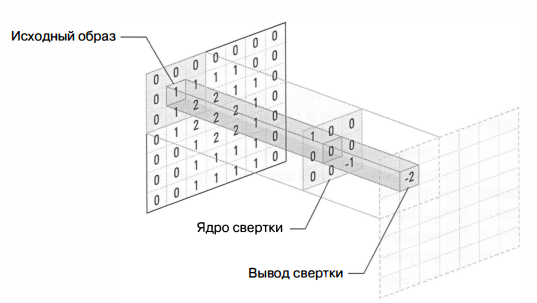

Рис. 3. Свертка обрабатывает фрагмент изображения с помощью матричного умножения

Сверточные слои обладают двумя важными свойствами, которые дают им важное преимущество перед полносвязными:

1. Шаблоны, которые они изучают, являются инвариантными в отношении переноса. После изучения определенного шаблона (например, в правом нижнем углу картинки) сверточная нейронная сеть сможет распознавать его повсюду (например, в левом верхнем углу). Полносвязной сети пришлось бы изучить шаблон заново, если он появляется в другом месте. Это увеличивает эффективность сверточных сетей в задачах обработки изображений (потому что видимый мир по своей сути является инвариантным в отношении переноса): таким сетям требуется меньше обучающих образцов для получения представлений, обладающих силой обобщения.

2. Они могут изучать пространственные иерархии шаблонов (рис. 4). Первый
сверточный слой будет изучать небольшие локальные шаблоны, такие как края,
второй — более крупные шаблоны, состоящие из признаков, возвращаемых
первым слоем, и т. д. Это позволяет сверточным нейронным сетям эффективно
изучать все более сложные и абстрактные визуальные представления.

  Спасибо нашему миру за то, что он пространственно-иерархический, поэтому наш мозг способен к познавательному мышлению, а именно анализу (разъединение целостного предмета на составляющие части с целью их всестороннего изучения) и синтезу (соединение ранее выделенных частей предмета в единое целое).

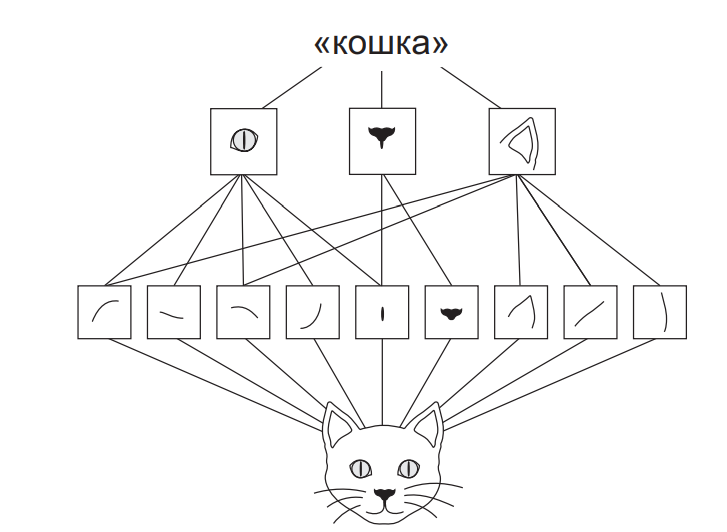

Рис. 4. Как мы видим мир: гиперлокальные края объединяются в локальные объекты, такие как глаза, уши, нос,  которые, в свою очередь, объединяются в объекты, например кошку.

Свертки определяются двумя ключевыми параметрами:
1. Размер шаблонов, извлекаемых из входных данных, — обычно 3 × 3 или 5 × 5.
В данном примере используется размер 3 × 3, что является распространенным
выбором.
2. Глубина выходной карты признаков — количество фильтров, вычисляемых
сверткой. В данном примере свертка начинается с глубины 32 и заканчивается
глубиной 64.

В Keras эти параметры передаются в слои `Conv2D` в первых аргументах:
`Conv2D(выходная_глубина, (высота окна, ширина окна))`.

Свертка работает методом скользящего окна: она двигает окно с размером 3 × 3
или 5 × 5 по трехмерной входной карте признаков, останавливается в каждой
возможной позиции и извлекает трехмерный шаблон окружающих признаков с формой `(высота окна, ширина окна, глубина входа)`. Каждый такой трехмерный шаблон затем преобразуется (путем умножения тензора на матрицу весов, получаемую в ходе обучения, которая называется ядром свертки) в одномерный вектор с формой `(выходная глубина,)`. Все эти векторы затем собираются в трехмерную выходную карту с формой `(высота, ширина, выходная глубина)`. Каждое пространственное местоположение в выходной карте признаков соответствует тому же местоположению во входной карте признаков (например, правый нижний угол выхода содержит информацию о правом нижнем угле входа).

Например, для окна 3 × 3 вектор $output[i, j, :]$ соответствует трехмерному шаблону $input[i-1:i+2, j-1:j+2, :]$.

Полный процесс изображен на рисунке:

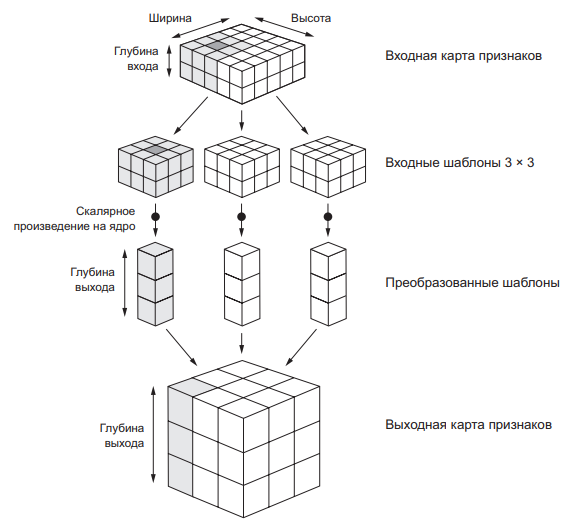

Рис. 5. Принцип действия свертки

Обратите внимание на то, что выходные ширина и высота могут отличаться от
входных. На то есть две причины:
* эффекты границ, которые могут устраняться дополнением входной карты признаков;
* использование шага свертки.

Рассмотрим подробнее эти понятия.

####Эффекты границ и дополнение

Рассмотрим карту признаков 5 × 5 (всего 25 клеток). Существует всего 9 клеток,
в которых может находиться центр окна 3 × 3, образующих сетку 3 × 3 (рис. 6).
Следовательно, карта выходных признаков будет иметь размер 3 × 3. Она получилась немного сжатой: ровно на две клетки вдоль каждого измерения. Вы можете увидеть, как проявляется эффект границ на более раннем примере: изначально у нас имелось 28 × 28 входов, количество которых после первого сверточного слоя сократилось до 26 × 26.

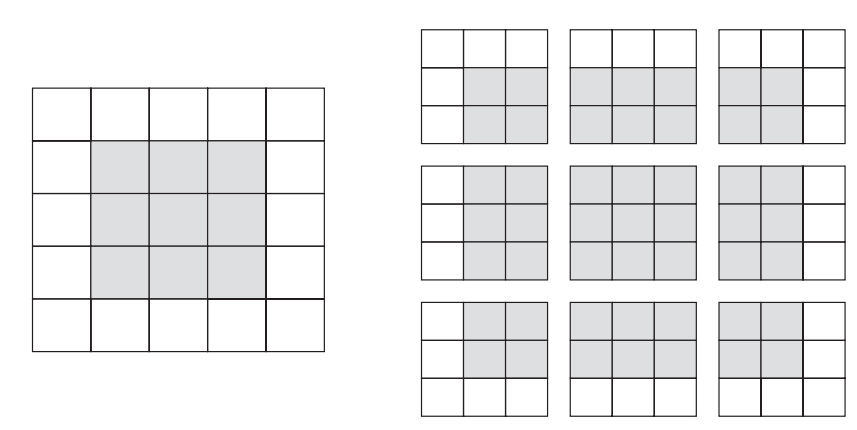

Рис. 6. Допустимые местоположения шаблонов 3 × 3 во входной карте признаков 5 × 5

Чтобы получить выходную карту признаков с теми же пространственными размерами, что и входная карта, можно использовать дополнение (padding). Дополнение заключается в добавлении соответствующего количества строк и столбцов с каждой стороны входной карты признаков, чтобы можно было поместить центр окна
свертки в каждую входную клетку. Для окна 3 × 3 нужно добавить один столбец
справа, один столбец слева, одну строку сверху и одну строку снизу. Для окна 5 × 5 нужно добавить две строки (рис. 7).


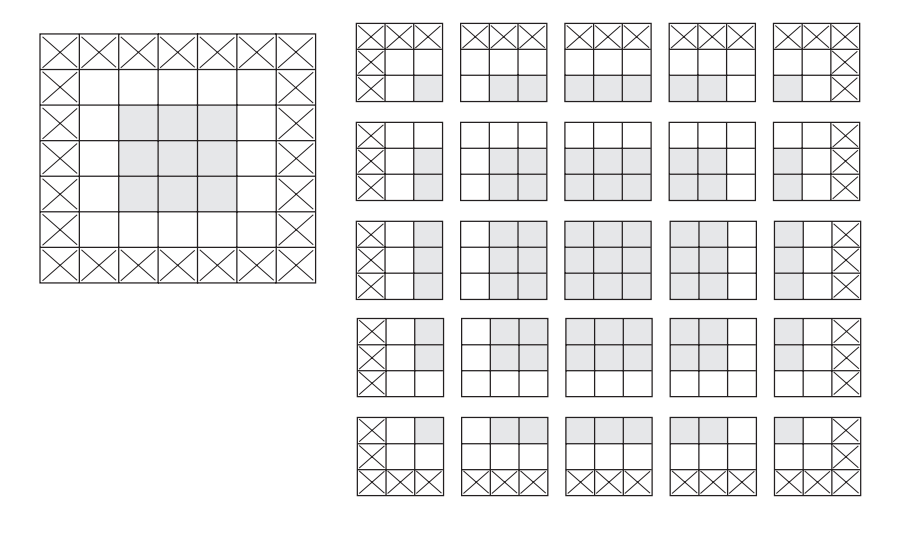

Рис. 7. Дополнение входной карты признаков 5 × 5, чтобы получить 25 шаблонов 3 × 3

При использовании слоев `Conv2D` дополнение настраивается с помощью именнованного аргумента `padding`, который принимает два значения: `valid`, означающее отсутствие дополнения (будут использоваться только допустимые местоположения окна), и `same`, означающее что необходимо дополнить так, чтобы выходная карта признаков имела ту же ширину и высоту, что и входная. По умолчанию аргумент `padding` имеет значение `valid`.

#### Шаг свертки

Шаг свертки также влияет на размер выходной карты признаков. До сих пор мы предполагали, что центральная клетка окна свертки последовательно перемещается в смежные клетки входной карты.

Однако расстояние между двумя соседними окнами - настраиваемый параметр, который называется **шагом свертки** и по умолчанию равен 1.

Также имеется возможность определять свертки с пробелами (strided сonvolutions) — свертки с шагом больше 1. На рис. 8 показано, как извлекаются шаблоны 3 × 3 сверткой с шагом 2 из входной карты 5 × 5 (без дополнения).

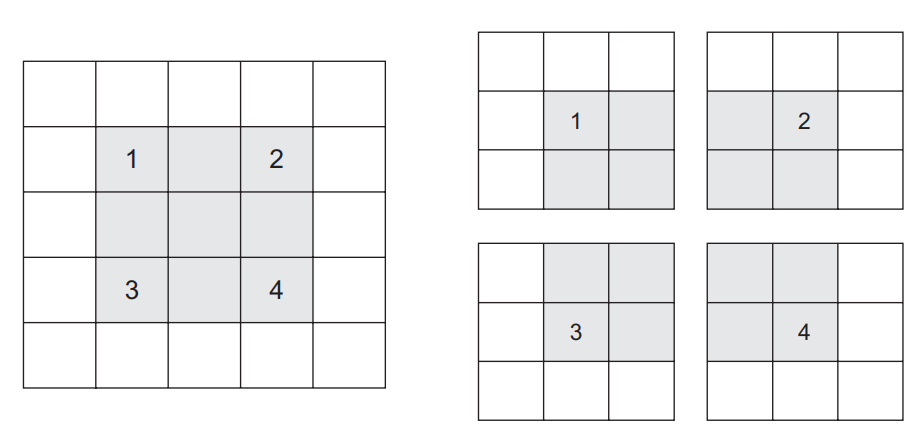

Рис. 8. Извлечение шаблонов 3 × 3 сверткой с шагом 2 из входной карты признаков 5 × 5 без дополнения

Использование шага 2 означает уменьшение ширины и высоты карты признаков
за счет уменьшения разрешения в два раза (в дополнение к любым изменениям,
вызванным эффектами границ). Свертки с пробелами редко используются на
практике, хотя могут пригодиться в моделях некоторых типов, поэтому желательно
знать и помнить об этой возможности.

Количество фильтров в слое, как и количество нейронов в полносвязанном слое, является гиперпараметром, который мы должны настраивать сами.

**Рекомендации по выбору числа фильтров для некоторой конкретной задачи:**
* Большое количество ядер упрощает идентификацию сложных признаков,
поэтому учитывайте сложность данных в решаемой задаче. Однако, чем
больше ядер, тем выше требования к вычислительным ресурсам.
* Если сеть имеет несколько сверточных слоев, оптимальное количество ядер
для каждого слоя может значительно отличаться. Имейте в виду, что ранние
слои идентифицируют простые признаки, тогда как более поздние — сложные комбинации этих простых признаков. Помните об этом, конструируя свою сеть. Обычно в задачах компьютерного зрения в более поздних сверточных слоях имеется гораздо больше ядер, чем в ранних.
* Как всегда, старайтесь свести к минимуму сложность вычислений: лучше
использовать минимальное количество ядер, обеспечивающих минимальную
ошибку на проверочных данных. Если удвоение количества ядер (например,
с 32 до 64 и после до 128) в заданном слое значительно снижает ошибку на
проверочных данных, используйте большее значение. Если уменьшение
числа ядер (например, с 32 до 16 и после до 8) в заданном слое не увеличивает
ошибку на проверочных данных, используйте меньшее значение.

### Объединение, подвыборка (субдискретизация)

Сверточные слои часто работают в тандеме со слоями другого типа, являющимися основными элементами нейронных сетей компьютерного зрения: **слои объединения или субдискретизации (pooling layers)**. Также в литературе слои объединения иногда называют подвыборкой. Они служат для уменьшения общего числа параметров в сети и снижения сложности, тем самым ускоряя вычисления и помогая избежать переобучения.

Результатом работы сверточного слоя является трехмерный массив карт активаций, причем глубина этого массива соответствует количеству фильтров в сверточном слое. Слой субдискретизации пространственно уменьшает размеры этих карт активаций, но оставляет глубину без изменений.

Подобно сверточным слоям, любой слой субдискретизации имеет такие гиперпараметры, как размер фильтра и длина шага. Так же как сверточный слой, слой субдискретизации скользит по своим входным данным. В каждой конкретной позиции он применяет операцию сокращения данных. Чаще всего для этого используется операция `max`, и такие слои называют слоями субдискретизации по
максимальному значению. Пример его работы представлен на рис. 9.

В примере MNIST выше видно, что размер карты признаков уменьшается вдвое после каждого слоя MaxPooling2D. Например, перед первым слоем MaxPooling2D карта признаков имела размер 26 × 26, но операция выбора максимального значения из соседних уменьшила ее до размера 13 × 13.

В этом заключается предназначение данной операции: агрессивное уменьшение
разрешения карты признаков, во многом подобное свертке с пробелами.
Операция выбора максимального значения из соседних заключается в следующем:
из входной карты признаков извлекается окно, и из него выбирается максимальное
значение для каждого канала. Концептуально это напоминает свертку, но вместо
преобразования локальных шаблонов с обучением на линейных преобразованиях
(ядро свертки) они преобразуются с использованием жестко заданной тензорной
операции выбора максимального значения. Главное отличие от свертки состоит
в том, что выбор максимального значения из соседних обычно производится с окном 2 × 2 и шагом 2, чтобы уменьшить разрешение карты признаков в два раза.
Собственно свертка, напротив, обычно выполняется с окном 3 × 3 и без указания шага (шаг по умолчанию равен 1).



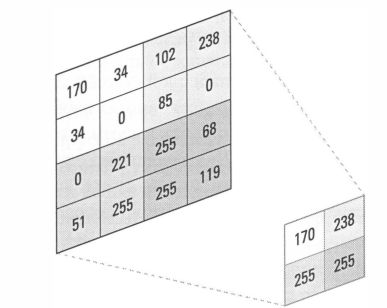

Рис. 9. Слой MaxPooling2D. Пример работы.

Возникают справедливые вопросы:
* С какой целью вообще производится снижение разрешения карты признаков?
* Почему бы просто не убрать слои MaxPooling2D и не использовать карты признаков большего размера?

Рассмотрим этот вариант. Сверточная основа модели в этом случае будет выглядеть так:

In [ ]:
model_no_max_pool = models.Sequential()
model_no_max_pool.add(layers.Conv2D(32, (3, 3), activation='relu',
 input_shape=(28, 28, 1)))
model_no_max_pool.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_no_max_pool.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_no_max_pool.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 22, 22, 64)        36928     
                                                                 
Total params: 55744 (217.75 KB)
Trainable params: 55744 (217.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Что не так в этой модели?**

Во-первых, она не способствует изучению пространственной иерархии признаков. Окна 3 × 3 в третьем слое содержат только информацию, поступающую из окон 7 × 7
в исходных данных. Высокоуровневые шаблоны, изученные с помощью сверточной нейронной сети, будут слишком малы в сравнении с начальными данными, чего может оказаться недостаточно для обучения классификации цифр.

**Попробуйте распознать цифру, посмотрев на нее через окна 7 × 7 пикселей!**

Нам нужно, чтобы признаки, полученные от последнего сверточного слоя, содержали информацию о совокупности исходных данных.

Во-вторых, заключительная карта признаков имеет 22 × 22 × 64 = 30 976 коэффициентов на образец. Это очень много. Если бы вы решили сделать ее плоской, чтобы наложить сверху слой Dense размером 512, этот слой имел бы 15,8 миллиона параметров. Это слишком много для такой маленькой модели и в результате приведет к интенсивному переобучению.

Проще говоря, уменьшение разрешения используется для уменьшения количества
коэффициентов в карте признаков для обработки, а также внедрения иерархий
пространственных фильтров путем создания последовательных слоев свертки
для просмотра все более крупных окон.

Обратите внимание на то, что операция выбора максимального значения не
единственный способ уменьшения разрешения. Как вы уже знаете, на предыдущих сверточных слоях можно также использовать шаг свертки. Кроме того,
вместо выбора максимального значения можно использовать операцию выбора среднего значения по соседним элементам (average pooling), когда каждый
локальный шаблон преобразуется путем взятия среднего значения для каждого
канала в шаблоне вместо максимального. Однако операция выбора максимального значения обычно дает лучшие результаты, чем эти альтернативные решения.
Причина в том, что признаки, как правило, кодируют пространственное присутствие некоторого шаблона или понятия в разных клетках карты признаков,
поэтому максимальное присутствие признаков намного информативнее, чем
среднее присутствие. Поэтому более разумная стратегия снижения разрешения
состоит в том, чтобы сначала получить плотные карты признаков (путем обычной
свертки без пробелов), а затем рассмотреть максимальные значения признаков
в небольших шаблонах, а не разреженные окна из входных данных (путем свертки
с пробелами) или усредненные шаблоны, которые могут привести к пропуску
информации о присутствии.



На данном этапе у вас должно было сложиться достаточно полное представление об
основах сверточных нейронных сетей — картах признаков, операциях свертки
и выбора максимального значения по соседним элементам, а также о том, как
сконструировать небольшую сверточную нейронную сеть для решения такой простой задачи, как классификация цифр из набора MNIST.

Теперь [перейдем](https://colab.research.google.com/drive/1e1aZ9K1vQIujPf1mzmta5xtbfNqJ_ai-) к более полезным и практичным применениям.